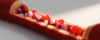

In [15]:
import bpy
from IPython.display import display, Image


def render_image(resx=200, resy = 100):
    path = "test.png"
    bpy.context.scene.render.resolution_x = resx
    bpy.context.scene.render.resolution_y = resy
    bpy.context.scene.render.image_settings.file_format = 'PNG'
    bpy.ops.render.render()
    bpy.data.images['Render Result'].save_render(filepath=path)
    display(Image(filename=path, width=500))


bpy.ops.wm.open_mainfile(filepath="blood_vessel.blend")

render_image(resx = 100, resy = 40)

In [3]:
import sys
import os

sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')